In [24]:
!ls

sample_data


In [25]:
!wget https://github.com/futurexskill/ml-model-deployment/raw/main/mnistmodel.zip

--2020-10-18 22:16:01--  https://github.com/futurexskill/ml-model-deployment/raw/main/mnistmodel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/futurexskill/ml-model-deployment/main/mnistmodel.zip [following]
--2020-10-18 22:16:01--  https://raw.githubusercontent.com/futurexskill/ml-model-deployment/main/mnistmodel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2868489 (2.7M) [application/zip]
Saving to: ‘mnistmodel.zip’

mnistmodel.zip      100%[===================>]   2.74M  14.3MB/s    in 0.2s    

2020-10-18 22:16:01 (14.3 MB/s) - ‘mnistmodel.zip’ saved [2868489/2868489]



In [27]:
!ls

mnistmodel.zip	sample_data


In [28]:
!unzip mnistmodel.zip

Archive:  mnistmodel.zip
   creating: image_classifier_model/
   creating: image_classifier_model/1/
   creating: image_classifier_model/1/assets/
  inflating: image_classifier_model/1/saved_model.pb  
   creating: image_classifier_model/1/variables/
  inflating: image_classifier_model/1/variables/variables.index  
  inflating: image_classifier_model/1/variables/variables.data-00000-of-00001  


In [29]:
!ls

image_classifier_model	mnistmodel.zip	sample_data


In [30]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


In [31]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [32]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [33]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [34]:
from tensorflow.keras.models import load_model


In [35]:
mnist_new_model = load_model('image_classifier_model/1/')


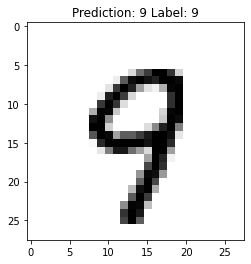

In [36]:
test_image = test_images[5233,:].reshape(1,784)
predicted_cat = mnist_new_model.predict(test_image).argmax()
label = test_labels[5233].argmax()
plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.show()

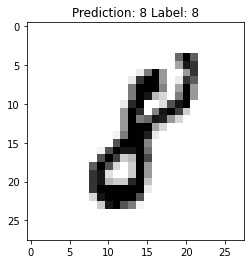

In [37]:
test_image = test_images[3245,:].reshape(1,784)
predicted_cat = mnist_new_model.predict(test_image).argmax()
label = test_labels[3245].argmax()
plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.show()